# ch 1. k-means clustering

## 지도학습, 비지도 학습

머신 러닝 알고리즘은 크게 지도 학습과 비지도 학습, 두 종류로 분류할 수 있습니다. 

- 지도 학습
    - 라벨이 주어진 데이터 셋으로 모델을 학습
    - 클래시피케이션이 대표적인 사례
    
- 비지도 학습
    - 라벨이 주어지지 않은 데이터 셋으로 학습
    - 클러스터링이 대표적인인 사례

## Clustering
군집(clustering) 분석은 데이터 셋의 관측값이 가지고 있는 여러 속성을 분석하여 서로 비슷한 특징을 갖는 관측값끼리 같은 클러스터로 묶는 알고리즘입니다. 

클러스터링을 적용하여 유저들을 특정 그룹으로 묶어서 이벤트 메세지를 발송한다던가, 어느 그룹에도 속하지 못하는 이상 유저를 발견할 수도 있습니다. 이번 챕터에서는 clustering 알고리즘 중 가장 대표적인 k-means clustering을 실습과 함께 배워보겠습니다.

## K-means clustering

K means clustering은 데이터들을 미리 지정한 K개의 그룹으로 군집화 하는 알고리즘입니다. 알고리즘 학습 과정을 이미지와 함께 이해해보겠습니다.

1. 데이터 셋에서 무작위로 K개의 샘플을 추출하여 클러스터의 중심으로 설정
2. 각 데이터들은 가장 가까이에 위치한 중심점 클러스터로 묶인다.
3. 각 클러스터의 중심으로 기존 중심점을 재조정한다.
4. 수렴할 때까지 2, 3 과정을 반복한다.

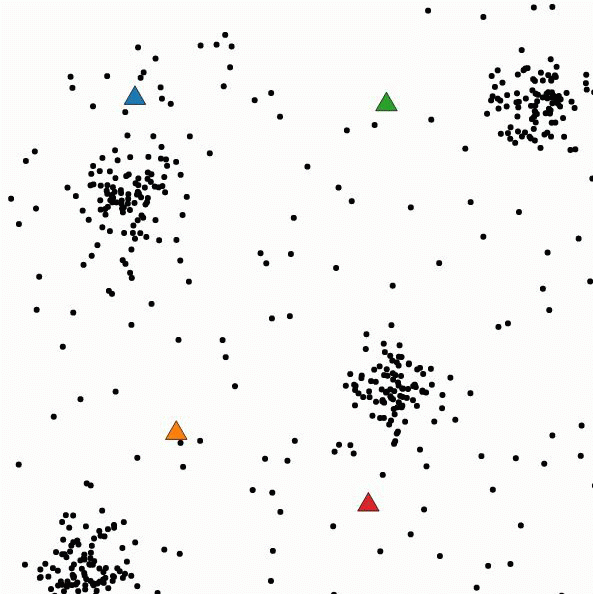

K-means 알고리즘에도 여러 기법들이 있습니다. 각 기법에 따라서 처음에 데이터를 어떻게 분할할지, 중심점을 특정 데이터 샘플로 지정할 지, 아니면 데이터 샘플들의 평균 값을 취할지가 달라집니다. 자세한 내용이 궁금하신 분들은 아래 문서를 참고하세요.

K-means-clustering 위키피디아: https://ko.wikipedia.org/wiki/K-%ED%8F%89%EA%B7%A0_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98

### K-means clustering의 한계점
### K를 미리 지정해야함
K-means clustering은 사전에 클러스터의 개수를 지정해주어야 합니다. 때문에 최적의 K 값을 찾는 것이 상당히 애매합니다. 아래 이미지를 보면 실제로는 클러스터를 4개로 지정해야 적절하지만, K=3일 경우에도 수렴하는 모습을 보입니다.

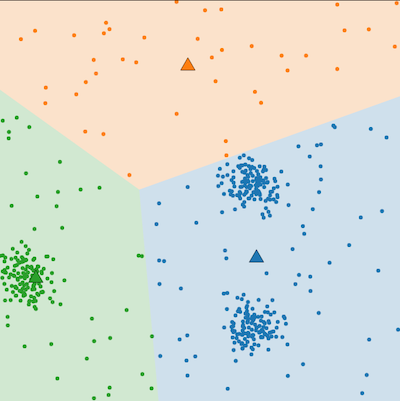

### outlier에 취약
outlier에도 민감한 편입니다. 클러스터의 중심점을 클러스터에 속한 데이터 샘플들의 평균으로 구하기 때문에 특이값이 존재할 경우 중심점의 위치가 크게 변하는 한계가 있습니다.

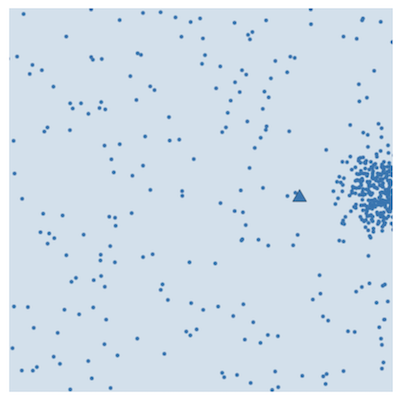

### 구형이 아닌 클러스터에는 부적합
구형으로 모여있지 않은 클러스터를 찾는데 적절하지 않습니다.

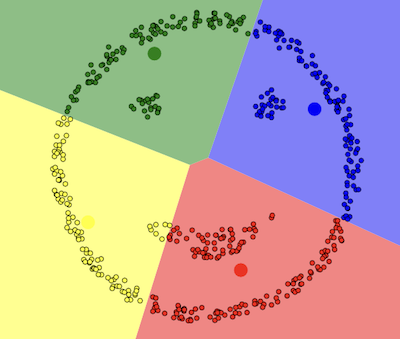

## 클러스터 개수 정하기

K means clustering 알고리즘을 학습시키려면 클러스터 개수 K를 지정해야 합니다. 클러스터 개수를 정하는 방법에는 두 가지 방법이 있습니다.

### 수식을 이용해서 정하기

$$k\approx\sqrt{n/2}$$

###  elbow method
다른 방법으로는 클러스터 개수를 순차적으로 늘리면서 결과 추이를 지켜보는 것입니다. 그리고 최적의 결과를 내는 클러스터 개수를 최종 선택합니다. 이를 elbow method 라고도 부릅니다. 왜 elbow method라고 부르는 지는 직접 K-means clustering 모델을 학습시켜보면서 알아보겠습니다.

보통은 최적의 K 값이 무엇인지 확신할 수 없으니, elbow method를 이용해서 여러번 모델을 학습시키고, 가장 결과가 좋은 K 값을 선택합니다.

## 예제) 고객 군집화하기

어느 마트의 고객들의 나이, 소득, 소비 데이터가 주어졌습니다. 해당 마트는 고객들을 일정한 그룹으로 묶어서 맞춤형 마케팅을 진행해보려고 합니다. Clustering 알고리즘을 이용해서 고객들의 그룹을 묶고, 각 그룹별 마케팅 전략을 수립해보겠습니다.

데이터 셋 출처: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

데이터 셋 컬럼 설명

- Age: age
- Income: Annual Income in K $
- Spending: Score from 1 to 100

가장 먼저 떠올릴 수 있는 군집인 남성과 여성으로 데이터들을 그룹지어보고, 일정한 패턴이 있는지 확인해보겠습니다.

자세한건 통계적 검정을 해봐야 알겠지만, scatterplot과 kdeplot을 보아도 특별히 패턴이 발견되지 않습니다. 이번에는 K-means clustering을 진행해보겠습니다. 

### 연령 - 소비지수 클러스터링

먼저 Age와 Spending 두 변수를 이용하여 클러스터링을 해보겠습니다. 최적의 K 개수를 찾기 위해서 elbow method를 사용하겠습니다. 2개부터 11개 사이로 개수를 늘려가면서 그룹 내 중심점으로부터 데이터 샘플 사이의 거리에 해당하는 intertia를 측정해보겠습니다. 

intertia의 추이를 보면 4개까지는 급격히 줄어들다가 서서히 수렴합니다. 그러므로 가장 적절한 K를 4라고 판단하여 모델을 학습시킨 뒤, 이를 시각화 해보겠습니다.

군집 분석 결과 흥미롭게도 나이가 어리면서도 소비 지수가 높은 군집이 발견되었습니다. 만약 마케팅을 진행한다면 이들을 대상으로한 전략을 제안할 수 있어보입니다.

### 수입 - 소비지수 클러스터링

같은 방법론을 Income과 Spending 데이터에 적용해보겠습니다.

최적의 클러스터 개수를 5로 지정하여 K-means clustering을 수행한 다음, 시각화 해보겠습니다.

이를 해석해보면, 전체적으로 다섯개의 그룹으로 묶을 수 있습니다. 특히 수입이 적은데 지출이 큰 그룹, 수입이 많고 지출이 큰 그룹을 대상으로는 각기 다른 마케팅 전략을 세워볼 수 있을 것 같습니다. 또한 수입은 큰데 지출이 작은 그룹은 왜 지출이 작은지 추가 분석을 진행할 수 있습니다.

### 연령 - 수입 - 소비지수 클러스터링

이번에는 3차원 클러스터링을 적용해보고, 시각화도 진행해보겠습니다. 3차원 클러스터링도 동일하게 Kmeans clustering 알고리즘을 학습시키고, inertia 값을 측정하여 최적 클러스터 개수를 찾을 수 있습니다.

3차원 좌표 공간 시각화를 위해 새로운 시각화 라이브러리 plotly를 사용하겠습니다.

In [ ]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 6.1 MB/s eta 0:00:00m eta 0:00:010:00:01


동일하게 elbow method로 적정 클러스터 개수를 찾아보겠습니다.

최적 클러스터 개수를 6개로 지정하여 모델을 학습시키고, 3차원 좌표 공간에 시각화 해보겠습니다.

plotly를 이용하여 3차원으로 시각화를 해보면 더 확연하게 유저들이 군집을 이루고 있는 것을 확인할 수 있습니다. 여기서 얻은 인사이트를 바탕으로 추가 분석을 진행하거나 마케팅 전략을 수립할 수 있습니다.

데이터의 차원이 더 높아지더라도 K-means clustering을 적용할 수 있습니다. 다만, 시각화를 할 수가 없어서 군집의 형태나 아웃라이어의 존재 여부를 파악하는 것이 어렵습니다.

## 정리

이번 챕터에서는 클러스터링 알고리즘들 중 가장 대표적인 K-means clustering에 대해서 배워봤습니다. 그리고 최적의 클러스터 개수를 찾는 elbow method를 익혀보았고, 실제 유저 데이터를 가지고 2차원 클러스터링, 3차원 클러스터링을 각각 진행해보았습니다. 이어지는 챕터들에서는 다른 클러스터링 기법들에 대해서 알아보겠습니다.